<a href="https://colab.research.google.com/github/mbyanfei/Google-Colab/blob/master/Apigian_NashAnalyticsPresentation/Apigian_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning Walkthrough

![MTSU Data Science Institute](https://github.com/mbyanfei/AnalyticsSummit/blob/master/Apigian_NashAnalyticsPresentation/images/MTDataScienceInstituteHorizontal.jpg?raw=1)

### Summary of Notebook
#### Created by Charlie H. Apigian, PhD.  - Interim Director of the Data Science Institute at MTSU
<br>
#### Contents
- Frame the Business Problem
- Import Libraries
- Import Data
- Explore the Data
- Cleanse the Data
- Transform the Data
- Split the Data
- Select and Run the Model
- Fine Tune the Model


# --------------------------------------------------------------------------------
# XXXXXXXXXXXXX  What is the Business Problem XXXXXXXXXXXXX
# --------------------------------------------------------------------------------

# --------------------------------------------------------------------------------
# XXXXXXXXXXXXXXXXXX  Import Libraries XXXXXXXXXXXXXXXXXX
# --------------------------------------------------------------------------------

In [2]:
# import sys
# !{sys.executable} -m pip install seaborn

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
    100% |████████████████████████████████| 286kB 977kB/s ta 0:00:01
    100% |████████████████████████████████| 62.0MB 7.8kB/s eta 0:00:01    21% |███████                         | 13.4MB 6.8MB/s eta 0:00:08    30% |█████████▊                      | 18.8MB 2.4MB/s eta 0:00:19    79% |█████████████████████████▍      | 49.2MB 1.6MB/s eta 0:00:08    84% |███████████████████████████     | 52.3MB 1.8MB/s eta 0:00:06


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

# --------------------------------------------------------------------------------
# XXXXXXXXXXXXXXXXXXX  Import Data XXXXXXXXXXXXXXXXXXX
# --------------------------------------------------------------------------------

### Import the data and create dataframes and arrays that can then be cleansed, transformed, and split.

In [4]:
import requests

url_loandata="https://raw.githubusercontent.com/capigian/AnalyticsSummit/master/Apigian_NashAnalyticsPresentation/data/Loan_Data.csv"

df_loandata_url=pd.read_csv(url_loandata, index_col = 1, header = 0)

In [6]:
df_loandata_url.head(8)

,member_id,term,sub_grade,emp_length,home_ownership,annual_inc,purpose,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_debt,total_credit_rv,loan_status
loan_amnt,,,,,,,,,,,,,,,,,,,,
7200,149512,36,D4,9,RENT,58000.0,debt_consolidation,0,26.0,6,0,3874,25.0,0,30,0,0,154930,4300,Fully Paid
8000,384456,36,B3,10,MORTGAGE,64000.0,debt_consolidation,0,NaN,8,0,29797,22.0,0,0,0,0,0,0,Fully Paid
16000,407046,36,B1,4,RENT,55000.0,debt_consolidation,0,NaN,12,0,6840,38.0,0,0,0,0,29116,24800,Fully Paid
35000,507531,36,B1,8,RENT,130000.0,credit_card,0,NaN,11,0,23025,37.0,0,0,0,0,60019,55800,Fully Paid
21000,513904,36,A1,10,RENT,120000.0,debt_consolidation,0,NaN,16,0,18641,35.0,0,0,0,0,37603,85031,Fully Paid
20000,551068,60,C1,10,OWN,40800.0,debt_consolidation,0,NaN,9,0,18477,18.0,0,0,0,0,0,0,Fully Paid
24975,572165,36,C1,9,MORTGAGE,57000.0,debt_consolidation,0,29.0,10,0,24313,25.0,1,29,0,94,170151,34000,Charged Off
3600,602177,36,A1,5,MORTGAGE,65000.0,personal,0,NaN,8,0,3920,22.0,0,0,0,0,0,0,Fully Paid


In [7]:
pwd

'/home/pi/git/Google-Colab/Apigian_NashAnalyticsPresentation'

In [8]:
%ls

Apigian_Solution.ipynb


In [ ]:
# df_loandata = pd.read_csv('data/Loan_Data.csv', index_col = 0, header = 0)
# df_loandata.info()

In [ ]:
# df_loandata.head()

# --------------------------------------------------------------------------------
# XXXXXXXXXXXXXXXXXX  Explore the Data XXXXXXXXXXXXXXXXXX
# --------------------------------------------------------------------------------

### Why explore before cleanse?  Exploring and cleansing may be conducted simultaneously, but you cannot cleanse without looking at the data first

https://seaborn.pydata.org/examples/index.html

In [9]:
df_loandata = df_loandata_url

In [10]:
df_loandata.head(25)
# index on left side and NaN???

,member_id,term,sub_grade,emp_length,home_ownership,annual_inc,purpose,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_debt,total_credit_rv,loan_status
loan_amnt,,,,,,,,,,,,,,,,,,,,
7200,149512,36,D4,9,RENT,58000.0,debt_consolidation,0,26.0,6,0,3874,25.0,0,30,0,0,154930,4300,Fully Paid
8000,384456,36,B3,10,MORTGAGE,64000.0,debt_consolidation,0,NaN,8,0,29797,22.0,0,0,0,0,0,0,Fully Paid
16000,407046,36,B1,4,RENT,55000.0,debt_consolidation,0,NaN,12,0,6840,38.0,0,0,0,0,29116,24800,Fully Paid
35000,507531,36,B1,8,RENT,130000.0,credit_card,0,NaN,11,0,23025,37.0,0,0,0,0,60019,55800,Fully Paid
21000,513904,36,A1,10,RENT,120000.0,debt_consolidation,0,NaN,16,0,18641,35.0,0,0,0,0,37603,85031,Fully Paid
20000,551068,60,C1,10,OWN,40800.0,debt_consolidation,0,NaN,9,0,18477,18.0,0,0,0,0,0,0,Fully Paid
24975,572165,36,C1,9,MORTGAGE,57000.0,debt_consolidation,0,29.0,10,0,24313,25.0,1,29,0,94,170151,34000,Charged Off
3600,602177,36,A1,5,MORTGAGE,65000.0,personal,0,NaN,8,0,3920,22.0,0,0,0,0,0,0,Fully Paid
15000,603349,36,C4,0,MORTGAGE,72000.0,personal,0,62.0,18,1,11702,30.0,0,62,0,0,227890,26300,Fully Paid


## Describe the data
## XXXXXXXXXXXXX
### Shows a list of summary statistics - what to look for?
- Min and max for outliers
- Count to see how many columns have NaN values
![PandasSummaryStatistics.png](https://github.com/mbyanfei/AnalyticsSummit/blob/master/Apigian_NashAnalyticsPresentation/images/PandasSummaryStatistics.png?raw=1)
https://pandas.pydata.org/pandas-docs/stable/basics.html

In [11]:
df_loandata.describe()

,member_id,term,emp_length,annual_inc,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_debt,total_credit_rv
count,4.987000e+04,49870.000000,49870.000000,4.987000e+04,49870.000000,21790.000000,49870.000000,49870.000000,4.987000e+04,49865.000000,49870.000000,49870.000000,49870.000000,49870.000000,4.987000e+04,4.987000e+04
mean,2.283604e+06,40.496330,5.776078,7.159109e+04,0.224343,36.095503,11.006778,0.056527,1.601605e+04,24.320967,0.001143,6.014478,0.000822,36.864287,9.455061e+04,2.072933e+04
std,8.031995e+05,9.364652,3.547176,8.712060e+04,0.671164,21.490493,4.543002,0.266042,1.845353e+04,11.029044,0.036085,16.748695,0.034386,556.180288,1.453257e+05,2.779434e+04
min,1.495120e+05,36.000000,0.000000,5.000000e+03,0.000000,1.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.695031e+06,36.000000,2.000000,4.500000e+04,0.000000,18.000000,8.000000,0.000000,7.102250e+03,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,1.856641e+06,36.000000,6.000000,6.000000e+04,0.000000,33.000000,10.000000,0.000000,1.237350e+04,23.000000,0.000000,0.000000,0.000000,0.000000,3.054700e+04,1.540000e+04
75%,2.744758e+06,36.000000,10.000000,8.500000e+04,0.000000,52.000000,14.000000,0.000000,2.051675e+04,31.000000,0.000000,0.000000,0.000000,0.000000,1.479252e+05,2.970000e+04
max,4.076727e+06,60.000000,10.000000,1.236000e+07,18.000000,152.000000,53.000000,8.000000,1.743266e+06,99.000000,2.000000,152.000000,4.000000,55009.000000,8.000078e+06,2.013133e+06


In [13]:
df_loandata['annual_inc'].median()

60000.0

In [14]:
df_loandata['annual_inc'].mean()

71591.08597754166

In [15]:
df_loandata['annual_inc'].kurt()

9485.59746960201

In [16]:
df_loandata.corr()

,member_id,term,emp_length,annual_inc,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_debt,total_credit_rv
member_id,1.000000,0.016009,0.047172,0.047410,0.027957,-0.013445,0.056721,0.188628,0.087216,0.075352,0.041292,0.131181,0.031552,0.034155,0.272884,0.295545
term,0.016009,1.000000,0.091551,0.068021,0.012631,-0.019062,0.081851,-0.017797,0.122441,0.126942,0.000457,-0.014655,0.010938,-0.007853,0.101901,0.079184
emp_length,0.047172,0.091551,1.000000,0.059992,0.033516,-0.014936,0.046458,0.022189,0.104092,0.130888,0.003566,0.020530,0.007099,0.002899,0.099146,0.080826
annual_inc,0.047410,0.068021,0.059992,1.000000,0.041609,-0.047817,0.093873,-0.009339,0.248416,0.144454,0.001418,0.001158,0.003267,0.000931,0.293814,0.195372
delinq_2yrs,0.027957,0.012631,0.033516,0.041609,1.000000,-0.583592,0.054435,-0.025428,-0.024312,0.147723,0.011768,0.060983,0.068469,0.006185,0.085196,-0.003990
mths_since_last_delinq,-0.013445,-0.019062,-0.014936,-0.047817,-0.583592,1.000000,-0.017556,0.044569,-0.006879,-0.070118,-0.014451,0.191318,-0.051696,0.020036,-0.072567,-0.031899
open_acc,0.056721,0.081851,0.046458,0.093873,0.054435,-0.017556,1.000000,-0.007733,0.226263,0.661931,0.019035,0.022603,0.014598,0.008430,0.188848,0.248495
pub_rec,0.188628,-0.017797,0.022189,-0.009339,-0.025428,0.044569,-0.007733,1.000000,-0.063448,-0.004663,0.020424,0.019284,0.012456,0.025654,0.001079,-0.028967
revol_bal,0.087216,0.122441,0.104092,0.248416,-0.024312,-0.006879,0.226263,-0.063448,1.000000,0.232609,0.000166,-0.064138,0.001522,-0.018377,0.403285,0.713280
total_acc,0.075352,0.126942,0.130888,0.144454,0.147723,-0.070118,0.661931,-0.004663,0.232609,1.000000,0.007140,0.092267,0.014321,0.019103,0.272089,0.239322


In [12]:
df_loandata = df_loandata.reset_index()

In [13]:
df_loandata.head()

,loan_amnt,member_id,term,sub_grade,emp_length,home_ownership,annual_inc,purpose,delinq_2yrs,mths_since_last_delinq,...,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_debt,total_credit_rv,loan_status
0,7200,149512,36,D4,9,RENT,58000.0,debt_consolidation,0,26.0,...,0,3874,25.0,0,30,0,0,154930,4300,Fully Paid
1,8000,384456,36,B3,10,MORTGAGE,64000.0,debt_consolidation,0,NaN,...,0,29797,22.0,0,0,0,0,0,0,Fully Paid
2,16000,407046,36,B1,4,RENT,55000.0,debt_consolidation,0,NaN,...,0,6840,38.0,0,0,0,0,29116,24800,Fully Paid
3,35000,507531,36,B1,8,RENT,130000.0,credit_card,0,NaN,...,0,23025,37.0,0,0,0,0,60019,55800,Fully Paid
4,21000,513904,36,A1,10,RENT,120000.0,debt_consolidation,0,NaN,...,0,18641,35.0,0,0,0,0,37603,85031,Fully Paid


In [22]:
df_loandata[['loan_amnt', 'annual_inc', 'revol_bal', 'total_acc', 'tot_coll_amt']].corr()

,loan_amnt,annual_inc,revol_bal,total_acc,tot_coll_amt
loan_amnt,1.000000,0.229937,0.317752,0.252457,-0.015075
annual_inc,0.229937,1.000000,0.248416,0.144454,0.000931
revol_bal,0.317752,0.248416,1.000000,0.232609,-0.018377
total_acc,0.252457,0.144454,0.232609,1.000000,0.019103
tot_coll_amt,-0.015075,0.000931,-0.018377,0.019103,1.000000


In [23]:
del df_lonadata

In [24]:
df_loandata.term.value_counts() #Should probably encode term as 0 or 1

36    40527
60     9343
Name: term, dtype: int64

In [14]:
df_loandata_explore = df_loandata[['loan_amnt', 'emp_length', 'annual_inc', 'revol_bal', 'tot_cur_debt', 'total_credit_rv', 'purpose']]

In [15]:
df_loandata_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49870 entries, 0 to 49869
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_amnt        49870 non-null  int64  
 1   emp_length       49870 non-null  int64  
 2   annual_inc       49870 non-null  float64
 3   revol_bal        49870 non-null  int64  
 4   tot_cur_debt     49870 non-null  int64  
 5   total_credit_rv  49870 non-null  int64  
 6   purpose          49870 non-null  object 
dtypes: float64(1), int64(5), object(1)
memory usage: 2.5+ MB


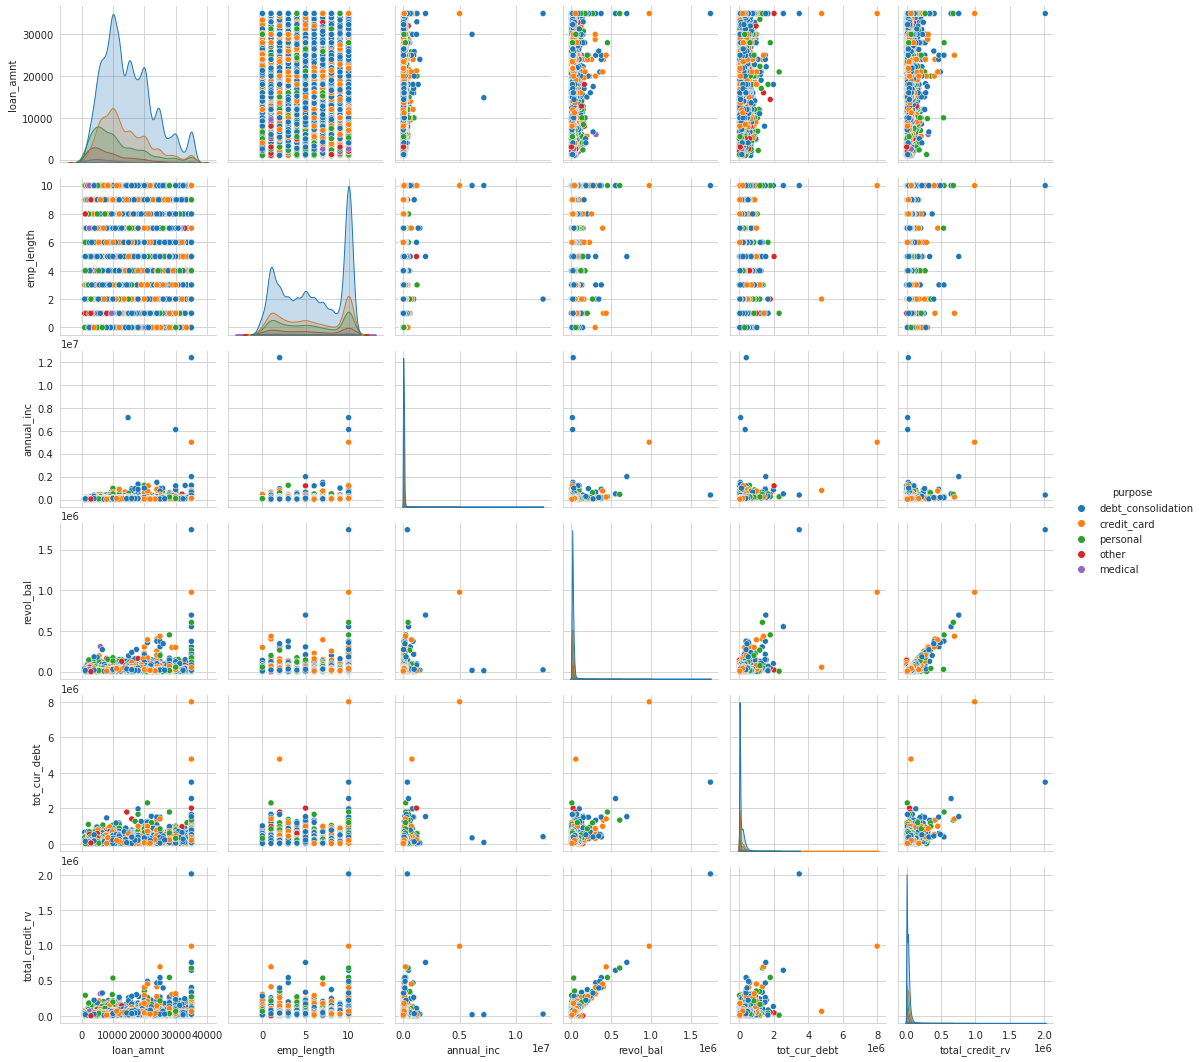

In [27]:
sns.pairplot(df_loandata_explore, hue = 'purpose')

In [16]:
df_loandata_explore_num = df_loandata_explore.drop('purpose', axis = 1)

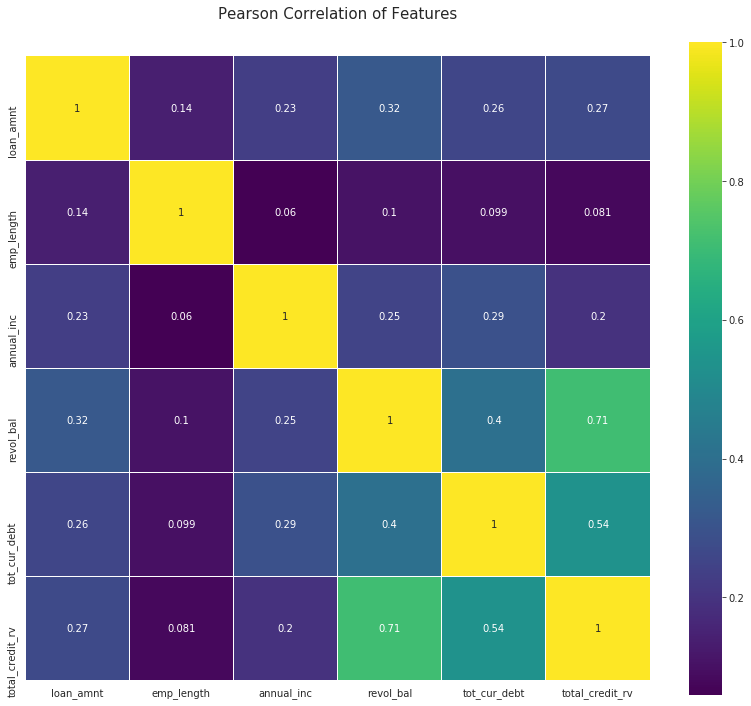

In [17]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_loandata_explore_num.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

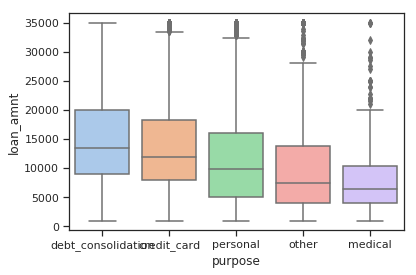

In [18]:
sns.set(style="ticks", palette="pastel")
ax2 = sns.boxplot(y='loan_amnt', x = 'purpose',  data=df_loandata_explore)


In [19]:
df_loandata_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49870 entries, 0 to 49869
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_amnt        49870 non-null  int64  
 1   emp_length       49870 non-null  int64  
 2   annual_inc       49870 non-null  float64
 3   revol_bal        49870 non-null  int64  
 4   tot_cur_debt     49870 non-null  int64  
 5   total_credit_rv  49870 non-null  int64  
 6   purpose          49870 non-null  object 
dtypes: float64(1), int64(5), object(1)
memory usage: 2.5+ MB


In [37]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)


0        58000.0
1        64000.0
2        55000.0
3       130000.0
4       120000.0
          ...   
49865   125000.0
49866    81000.0
49867   110000.0
49868   108000.0
49869    35000.0
Name: annual_inc, Length: 49870, dtype: float64


In [20]:
print(df_loandata_explore['annual_inc'])

0         58000.0
1         64000.0
2         55000.0
3        130000.0
4        120000.0
           ...   
49865    125000.0
49866     81000.0
49867    110000.0
49868    108000.0
49869     35000.0
Name: annual_inc, Length: 49870, dtype: float64


In [21]:
print(df_loandata_explore['revol_bal'])

0         3874
1        29797
2         6840
3        23025
4        18641
         ...  
49865    29123
49866    32651
49867    23691
49868    37822
49869     6602
Name: revol_bal, Length: 49870, dtype: int64


In [41]:
axes[1,0].ticklabel_format(style='plain', axis='y')

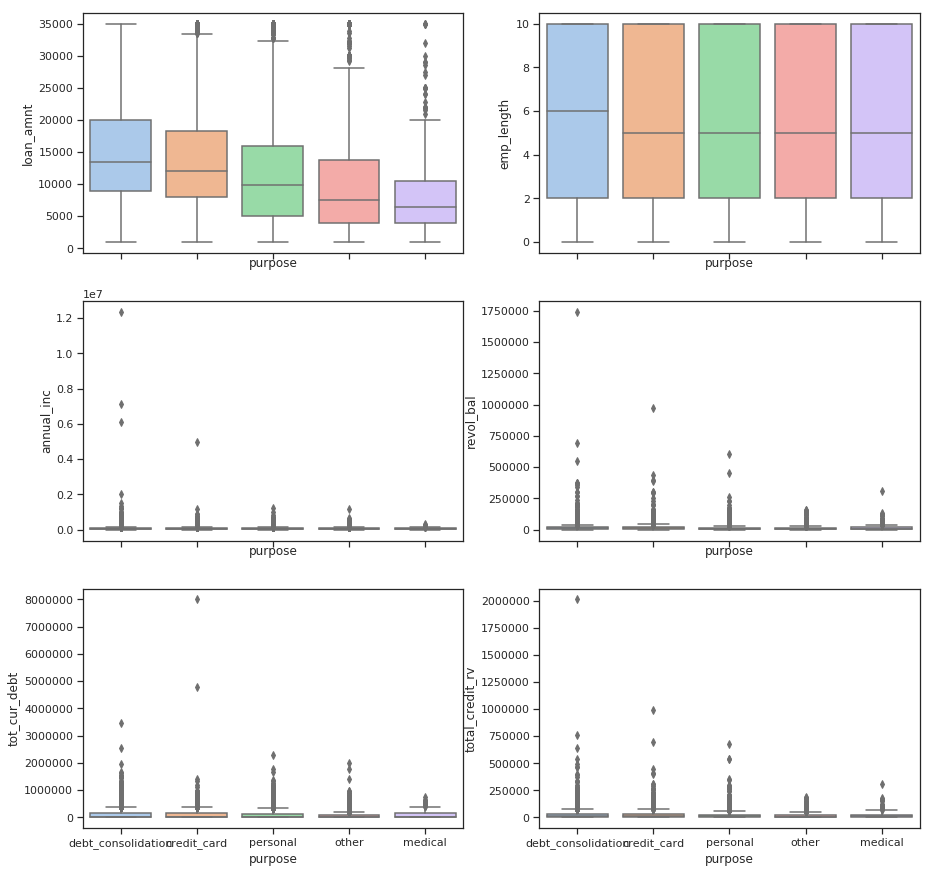

In [22]:
f, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=True)
sns.boxplot(y='loan_amnt', x = 'purpose',  data=df_loandata_explore, ax=axes[0,0])
sns.boxplot(y='emp_length', x = 'purpose',  data=df_loandata_explore, ax=axes[0,1])
sns.boxplot(y='annual_inc', x = 'purpose',  data=df_loandata_explore, ax=axes[1,0])
sns.boxplot(y='revol_bal', x = 'purpose',  data=df_loandata_explore, ax=axes[1,1])
sns.boxplot(y='tot_cur_debt', x = 'purpose',  data=df_loandata_explore, ax=axes[2,0])
sns.boxplot(y='total_credit_rv', x = 'purpose',  data=df_loandata_explore, ax=axes[2,1])

# --------------------------------------------------------------------------------
# XXXXXXXXXXXXXXXXXX  Cleanse the  Data XXXXXXXXXXXXXXXXXX
# --------------------------------------------------------------------------------

In [ ]:
df_loandata.info()

## Fill with a specific value

- Change all NaN values to 0.

In [ ]:
df_loandata.mths_since_last_delinq.isnull().sum()

In [ ]:
df_loandata['mths_since_last_delinq'] = df_loandata['mths_since_last_delinq'].fillna(0)

In [ ]:
df_loandata.info()

## Fill in the mean for total_acc

In [ ]:
pd.pivot_table(df_loandata,index=["purpose"], values=["total_acc"])

In [ ]:
mean_value = df_loandata['total_acc'].mean()
df_loandata['total_acc'] = df_loandata['total_acc'].fillna(mean_value)

In [ ]:
df_loandata.info()

## What is going on with Annual Income?

In [ ]:
df_loandata['annual_inc'].describe()

In [ ]:
df_loandata['annual_inc'].median()

In [ ]:
df_loandata.head()

In [ ]:
df_loandata[df_loandata['annual_inc'] >10000000]

### Mistake in entering the annual_inc - forgot to add the decimal places - should be 123,600.00 not 12,360,000.

In [ ]:
df_loandata.loc[[2968827], ["annual_inc"]]

In [ ]:
df_loandata.loc[[2968827], ["annual_inc"]]=123600

In [ ]:
df_loandata.loc[[2968827], ["annual_inc"]]

In [ ]:
sns.boxplot(y='annual_inc', x = 'purpose',  data=df_loandata)

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True)
sns.boxplot(y='annual_inc', x = 'purpose',  data=df_loandata, ax=axes[0,0])
sns.boxplot(y='revol_bal', x = 'purpose',  data=df_loandata, ax=axes[0,1])
sns.boxplot(y='tot_cur_debt', x = 'purpose',  data=df_loandata, ax=axes[1,0])
sns.boxplot(y='total_credit_rv', x = 'purpose',  data=df_loandata, ax=axes[1,1])

In [ ]:
df_loandata.drop(df_loandata[df_loandata.annual_inc > 1000000].index, inplace=True)
df_loandata.drop(df_loandata[df_loandata.revol_bal > 750000].index, inplace=True)
df_loandata.drop(df_loandata[df_loandata.tot_cur_debt > 3000000].index, inplace=True)
df_loandata.drop(df_loandata[df_loandata.total_credit_rv > 750000].index, inplace=True)

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True)
sns.boxplot(y='annual_inc', x = 'purpose',  data=df_loandata, ax=axes[0,0])
sns.boxplot(y='revol_bal', x = 'purpose',  data=df_loandata, ax=axes[0,1])
sns.boxplot(y='tot_cur_debt', x = 'purpose',  data=df_loandata, ax=axes[1,0])
sns.boxplot(y='total_credit_rv', x = 'purpose',  data=df_loandata, ax=axes[1,1])

In [ ]:
sns.boxplot(x='annual_inc', y = 'purpose' ,data=df_loandata)

# --------------------------------------------------------------------------------
# XXXXXXXXXXXXXXXXX  Transform the Data XXXXXXXXXXXXXXXXX
# --------------------------------------------------------------------------------

## Re-coding of categorical data

<br>
### 3 ways to recode categorical data
- **label encoder** - changes categories to integers based on alphabetical order
- **hot one encoder** - changes one column of categorical data into several binary (dummy) columns
- **use a custom function** for changing categories to integers

## Re-Label using Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lc = LabelEncoder()

In [ ]:
df_loandata.sub_grade.value_counts()

In [ ]:
df_loandata.head()

In [ ]:
df_loandata['sub_grade'] = lc.fit_transform(df_loandata['sub_grade'])

In [ ]:
df_loandata.sub_grade.value_counts()

## Dummy Variables - Hot one encoding

In [ ]:
dummies_home = pd.get_dummies(df_loandata['home_ownership'], drop_first = False)
dummies_purpose = pd.get_dummies(df_loandata['purpose'], drop_first = False)

In [ ]:
dummies_home.info()
dummies_purpose.info()

In [ ]:
df_loandata = pd.concat([df_loandata, dummies_home, dummies_purpose], axis = 1)
df_loandata.info()

In [ ]:
df_loandata = df_loandata.drop(["home_ownership", "purpose"], axis = 1)

In [ ]:
df_loandata.info()

In [ ]:
df_loandata.head()

## Create own numerical category

In [ ]:
df_loandata.loan_status.value_counts()

In [ ]:
def loanBad(d):
    if d['loan_status'] == 'Charged Off':
        return 1
    elif d['loan_status'] == 'In Grace Period':
        return 1
    else:
        return 0
df_loandata['loan_is_bad'] = df_loandata.apply(loanBad, axis = 1)
df_loandata.head()

## Create your target dataset

In [ ]:
y = df_loandata['loan_is_bad']
y.value_counts()

In [ ]:
df_loandata = df_loandata.drop('loan_status', axis = 1) #this drops the target variable from your original dataset,
# axis = 1 refers to dropping a column - where axis = 0 would drop row

## Save a copy of the data as a csv file
### Why at this point?
- includes target and feature variables

In [ ]:
df_loandata.to_csv('LoanData_Cleansed.csv')

### Create you Feature Dataset

In [ ]:
X = df_loandata.drop('loan_is_bad', axis = 1)
X.info()

In [ ]:
X.head()

# YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!

# You have create your X and y datasets.  You are ready to model and analyze.
 
# YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!YAY!

# --------------------------------------------------------------------------------
# XXXXXXXXXXXXXXXXXXX  Split the Data XXXXXXXXXXXXXXXXXXX
# --------------------------------------------------------------------------------

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
y_train

In [ ]:
y_train.values.reshape(-1,1)

## Feature Scaling
- StandardScaler
    - The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
    ![alt text](images/StandardScalar.png "Standard")
- MinMaxScaler
    - The MinMaxScaler is the probably the most famous scaling algorithm, and follows the following formula for each feature:
    ![alt text](images/MinMaxScalar.png "MinMax")
    

From http://benalexkeen.com/feature-scaling-with-scikit-learn/

In [ ]:
X_train.head()

In [ ]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)



X_test_sc = scaler.fit_transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

## To scale or not to scale?? Why after the split?

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['loan_amnt'], ax=ax1)
sns.kdeplot(X_train['annual_inc'], ax=ax1)
sns.kdeplot(X_train['tot_cur_debt'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(X_train_sc['loan_amnt'], ax=ax2)
sns.kdeplot(X_train_sc['annual_inc'], ax=ax2)
sns.kdeplot(X_train_sc['tot_cur_debt'], ax=ax2)
plt.show()

In [ ]:
X_train_sc.head()

In [ ]:
X_test_sc.head()

# --------------------------------------------------------------------------------
# XXXXXXXXXXXXXXX  Select and Run the Model XXXXXXXXXXXXXXX
# --------------------------------------------------------------------------------

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# Classification


### Logistic Regression
using non-scaled data

In [ ]:
loan_names=X_train.columns.values

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#without weights
logr = LogisticRegression()
logr.fit(X_train, y_train)
score = logr.score(X_test, y_test)
print(score)
print("")
log_pred = logr.predict(X_test)
print(confusion_matrix(y_test, log_pred))
print("")
print(classification_report(y_test, log_pred))

# --------------------------------------------------------------------------------
# XXXXXXXXXXXXXXXXX  Fine Tune the Model XXXXXXXXXXXXXXXXX
# --------------------------------------------------------------------------------

### Logistic Regression w/ Scaler

In [ ]:
logrsc = LogisticRegression(class_weight = {0:1, 1:3})
logrsc.fit(X_train_sc, y_train)
score = logrsc.score(X_test_sc, y_test)
score

In [ ]:
scaled_pred = logrsc.predict(X_test_sc)

In [ ]:
print(classification_report(y_test, scaled_pred))

In [ ]:
print(confusion_matrix(y_test, scaled_pred))

### Decision Tree
![Decision-Tree-Algorithms.png](https://github.com/mbyanfei/AnalyticsSummit/blob/master/Apigian_NashAnalyticsPresentation/images/Decision-Tree-Algorithms.png?raw=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier=DecisionTreeClassifier()
classifier=classifier.fit(X_train,y_train)

In [ ]:
df_loanpred = classifier.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, df_loanpred))
print("")
print("classification Report")
print(classification_report(y_test, df_loanpred))

In [ ]:
#Generating decision tree in a file(image)
from sklearn import tree
from io import StringIO
from IPython.display import Image, display

In [ ]:
out = StringIO()
tree.export_graphviz(classifier, out_file=out, filled=True,rounded=True)
from sklearn.tree import export_graphviz
import pydot 

In [ ]:
from sklearn.tree import export_graphviz
import pydot 

In [ ]:
dot_data = StringIO()  
export_graphviz(classifier, out_file=dot_data,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [ ]:
#Using Decision Tree Classifier
clf2=DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10)
clf2=clf2.fit(X_train,y_train)
clf2.score(X_test, y_test)

In [ ]:
dot_data = StringIO()  
export_graphviz(clf2, out_file=dot_data, feature_names=loan_names, filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [ ]:
depth = range(1,12)
scores = []

for d in depth:
    classifier=DecisionTreeClassifier(max_depth = d)
    classifier=classifier.fit(X_train,y_train)
    scores.append(classifier.score(X_test, y_test))
    print("iteration {} done".format(d))


plt.plot(depth, scores, '-o')
plt.xlabel('depth, d')
plt.ylabel('scores')
plt.xticks(depth)
plt.show()

In [ ]:
clf3=DecisionTreeClassifier(max_depth = 6, max_leaf_nodes=10)
clf3=classifier.fit(X_train,y_train)
clf3.score(X_test, y_test)

In [ ]:
dot_data = StringIO()  
export_graphviz(clf3, out_file=dot_data, feature_names=loan_names, filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [ ]:
df_loanpred3 = clf3.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, df_loanpred3))
print("")
print("classification Report")
print(classification_report(y_test, df_loanpred3))

In [ ]:
dt_fi = pd.DataFrame(classifier.feature_importances_)

In [ ]:
names = pd.DataFrame(list(X.columns))
df_feat_imp = pd.concat([dt_fi, names], axis = 1)

In [ ]:
df_feat_imp.columns = ['Importance', 'Features']
df_feat_imp.sort_values('Importance', ascending = False)

### Random Forest
![Ensemble-Algorithms.png](https://github.com/mbyanfei/AnalyticsSummit/blob/master/Apigian_NashAnalyticsPresentation/images/Ensemble-Algorithms.png?raw=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 90, max_depth = 10)
rf = rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
print(score)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))

In [ ]:
print(confusion_matrix(y_test, rf_pred))

In [ ]:
rf = RandomForestClassifier(n_estimators = 90, max_depth = 10)
rf = rf.fit(X_train_sc, y_train)
score = rf.score(X_test_sc, y_test)
print(score)
rf_pred1 = rf.predict(X_test_sc)
print(classification_report(y_test, rf_pred1))

In [ ]:
print(confusion_matrix(y_test, rf_pred1))

In [ ]:
fi = pd.DataFrame(rf.feature_importances_)

In [ ]:
columns = pd.DataFrame(list(X.columns))

In [ ]:
features = pd.concat([columns, fi], axis = 1)
features.columns = ['Feature', 'Importance']

In [ ]:
features.sort_values("Importance", ascending = False)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
# Create a pipeline
pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [LogisticRegression()],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10)},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': [10, 100, 1000],
                 'classifier__max_features': [1, 2, 3]}]

In [ ]:
# Create grid search 
clf_best = GridSearchCV(pipe, search_space, cv=5, verbose=0)

In [ ]:
# Fit grid search
best_model = clf_best.fit(X_train, y_train)

In [ ]:
# View best model
best_model.best_estimator_.get_params()['classifier']

In [ ]:
best_model.predict(X_test)

In [ ]:
score = best_model.score(X_test, y_test)
print("Accuracy Score")
print(score)
best_model_pred = best_model.predict(X_test)
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, best_model_pred))
print("")
print("Confusion Matrix")
print(classification_report(y_test, best_model_pred))

## Regression Analysis
![Regression-Algorithms.png](https://github.com/mbyanfei/AnalyticsSummit/blob/master/Apigian_NashAnalyticsPresentation/images/Regression-Algorithms.png?raw=1)

In [ ]:
df_loandata_reg = df_loandata[df_loandata['loan_is_bad'] == 0]

In [ ]:
df_loandata_reg.info()

### Scikit Simple Regression
using annual_inc as predictor

In [ ]:
X = df_loandata_reg.drop(['loan_is_bad', 'loan_amnt'], axis =1)
X.info()

In [ ]:
y = df_loandata_reg['loan_amnt']

In [ ]:
y

In [ ]:
y.values.reshape(-1, 1)

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

In [ ]:
reg = linear_model.LinearRegression()
annual_income = df_loandata_reg[['annual_inc']]

In [ ]:
reg.fit(annual_income, y)

In [ ]:
predictions = reg.predict(annual_income)

In [ ]:
df_predictions = pd.DataFrame(predictions)

In [ ]:
sns.lmplot(x="annual_inc", y="loan_amnt", data=df_loandata_reg,
            ci=None,  markers = 'o', order=3, hue="term", scatter_kws={"s": 50});

In [ ]:
g = sns.lmplot(x="annual_inc", y="loan_amnt", col="term", hue="term",
              data=df_loandata_reg)
g = (g.set_axis_labels("Annual Income", "Loan Amount")
       .set(ylim=(0, 40000))
       .fig.subplots_adjust(wspace=.02))

### Add an order of 3

In [ ]:
g = sns.lmplot(x="annual_inc", y="loan_amnt", order=3, col="term", hue="term",
              data=df_loandata_reg)
g = (g.set_axis_labels("Annual Income", "Loan Amount")
       .set(ylim=(0, 40000))
       .fig.subplots_adjust(wspace=.02))

In [ ]:
plt.scatter(annual_income, y, color = 'blue')
plt.plot(annual_income, predictions, color = 'black')
plt.show()

In [ ]:
reg.score(annual_income, y)

### Correlation Matrix

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_loandata_reg.astype(float).corr(),linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)


X_test_sc = scaler.fit_transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

### Fine tune the model to find optimal alpha value for Lasso

In [ ]:
alphas = [0.1, 0.5, 1, 5, 10, 25, 50, 100]
scores = []

for a in alphas:
    lasso = Lasso(alpha = a)
    lasso.fit(X_train_sc, y_train)
    scores.append(lasso.score(X_test_sc, y_test))
    print("iteration {} done".format(a))


plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

Alpha = 10 provides the best score (somewhat minimally)

In [ ]:
lasso = Lasso(alpha=10.0)

In [ ]:
lasso.fit(X_train_sc, y_train)

In [ ]:
lasso_pred = lasso.predict(X_train_sc)

In [ ]:
lasso.score(X_test_sc, y_test)

In [ ]:
lasso.coef_

In [ ]:
df_lasso = pd.DataFrame(lasso.coef_)

In [ ]:
names = pd.DataFrame(list(X.columns))

In [ ]:
df_lasso = pd.concat([df_lasso, names], axis = 1)

In [ ]:
df_lasso.columns = ['Coefficient', 'Feature']
df_lasso

## Ridge

### Import needed libraries

In [ ]:
from sklearn.linear_model import Ridge

### Fine tune the model to find optimal alpha value

In [ ]:
alphas = [1, 5, 10, 25, 50, 100, 150, 200, 300, 400, 500]
scores = []

for a in alphas:
    ridge = Ridge(alpha = a)
    ridge.fit(X_train_sc, y_train)
    scores.append(ridge.score(X_test_sc, y_test))
    print("iteration {} done".format(a))


plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

In [ ]:
ridge = Ridge(alpha=150)

In [ ]:
ridge.fit(X_train_sc, y_train)

In [ ]:
ridge_preds = ridge.predict(X_test_sc)

In [ ]:
ridge.score(X_test_sc, y_test)

In [ ]:
df_ridge = pd.DataFrame(ridge.coef_)

names = pd.DataFrame(list(X.columns))

df_ridge = pd.concat([df_ridge, names], axis = 1)

df_ridge.columns = ['Coefficient', 'Feature']
df_ridge

In [ ]:
lasso_pred = pd.DataFrame(lasso_pred)
ridge_pred = pd.DataFrame(ridge_preds)
preds = pd.concat([lasso_pred, ridge_pred], axis = 1)

In [ ]:
preds.columns = ['Lasso', 'Ridge']

In [ ]:
sns.regplot(x = 'Lasso', y = 'Ridge', data = preds)
plt.ylim(0,40000)